# Design an application related to public health (Cleaning Part)

The "Public Health France" agency has launched a call for projects to find innovative ideas for food-related applications. You want to participate and propose an application idea.

The Open Food Fact dataset is available on the official website. The variables are defined at this address.

The dataset has as datapoint each product (1443749 products) and for each, we have 181 columns which are separated in four sections :

- General information on the product datasheet: name, date of modification, etc.
- A set of tags: product category, location, origin, etc.
- The ingredients that make up the products and their possible additives.
- Nutritional information: quantity in grams of a nutrient per 100 grams of the product.
- The goal of the project is to understand this dataset, to draw some insights and finally to train a model able to predict the nutriscore for each product in the way of the Yuka application.

How is the nutriscore awarded?

The score takes into account for 100 grams of product, the content :

- Nutrients and foods to be promoted (fibers, proteins, fruits and vegetables),
- Nutrients to be limited (energy, saturated fatty acids, sugars, salt).
- After calculation, the score obtained by a product is used to assign it a letter (A to D) and a color.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Import

In [2]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep='\t', low_memory=False)

## 2. Data Description
##### Data Header

In [3]:
df.head(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1574175737,2019-11-19T15:02:17Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,NaN,100g,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08T18:56:13Z,1560020173,2019-06-08T18:56:13Z,Sfiudwx,NaN,dgesc,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Data Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443749 entries, 0 to 1443748
Columns: 181 entries, code to carnitine_100g
dtypes: float64(123), int64(2), object(56)
memory usage: 1.9+ GB


Here we see a problem, 56 columns are identified as object type. Once the columns have been sorted, we need to convert them to a floating type or category to continue our analysis of the data.


##### Show statistical analysis of our data set
Let's show min, max, mean, std, and count of each column in the dataset.

In [5]:
df.describe()

,created_t,last_modified_t,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,ingredients_from_palm_oil,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,1.443749e+06,1.443749e+06,0.0,0.0,4.407790e+05,0.0,640108.000000,0.0,640108.000000,0.0,...,10588.000000,582895.000000,28.000000,3.000000,0.0,38.000000,1711.000000,24.000000,44.000000,20.000000
mean,1.538325e+09,1.572286e+09,NaN,NaN,2.520790e+16,NaN,2.010467,NaN,0.020811,NaN,...,626.296455,9.173982,7.928571,29.333333,NaN,0.068208,0.068960,3.719583,0.025891,0.038885
std,4.592743e+07,2.594465e+07,NaN,NaN,1.673582e+19,NaN,2.846657,NaN,0.144587,NaN,...,6433.417497,8.914263,9.059182,15.011107,NaN,0.036215,1.827310,1.530099,0.026873,0.125679
min,1.328021e+09,1.333873e+09,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,NaN,...,0.049000,-15.000000,-6.000000,14.000000,NaN,0.008000,0.000000,0.400000,0.001350,0.004000
25%,1.507655e+09,1.563642e+09,NaN,NaN,2.800000e+01,NaN,0.000000,NaN,0.000000,NaN,...,111.000000,1.000000,0.000000,22.000000,NaN,0.053000,0.000008,3.325000,0.009225,0.007000
50%,1.546705e+09,1.582739e+09,NaN,NaN,5.000000e+01,NaN,1.000000,NaN,0.000000,NaN,...,329.360000,10.000000,5.500000,30.000000,NaN,0.069000,0.000023,3.950000,0.021000,0.008500
75%,1.577191e+09,1.587660e+09,NaN,NaN,1.130000e+02,NaN,3.000000,NaN,0.000000,NaN,...,614.200000,16.000000,17.000000,37.000000,NaN,0.089000,0.000096,4.450000,0.027700,0.011250
max,1.597972e+09,1.597972e+09,NaN,NaN,1.111111e+22,NaN,49.000000,NaN,3.000000,NaN,...,656298.600000,40.000000,25.000000,44.000000,NaN,0.150000,54.000000,7.300000,0.150000,0.572000


##### Show if there are missing datapoints

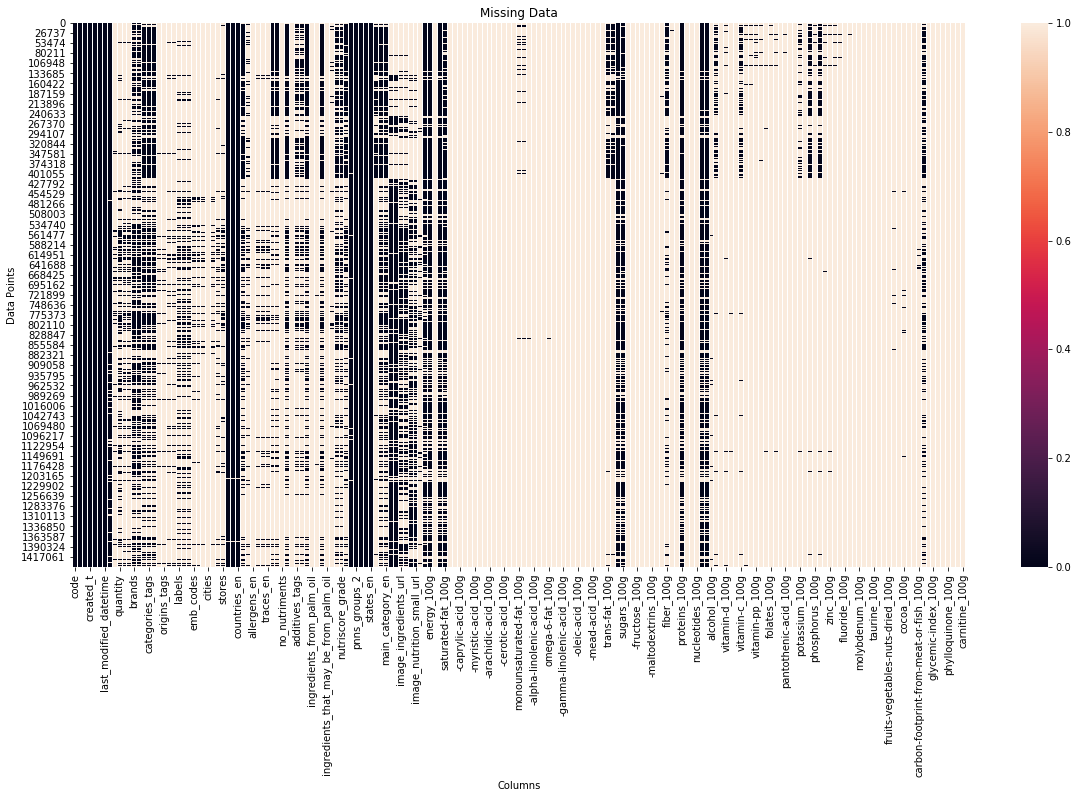

TypeError: heatmap() missing 1 required positional argument: 'data'

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.isnull(), ax=ax).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')
plt.show()

sns.heatmap()

In [7]:
#df.isnull().sum()/len(df)
obj = df.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

code , 0.0
url , 0.0
creator , 0.0
created_t , 0.0
created_datetime , 0.0
last_modified_t , 0.0
last_modified_datetime , 0.0
product_name , 4.54
generic_name , 92.77
quantity , 71.73
packaging , 84.13000000000001
packaging_tags , 84.13000000000001
brands , 44.91
brands_tags , 44.91
categories , 48.5
categories_tags , 48.5
categories_en , 48.5
origins , 95.67
origins_tags , 95.67999999999999
manufacturing_places , 93.13
manufacturing_places_tags , 93.13
labels , 76.64
labels_tags , 76.64
labels_en , 76.64
emb_codes , 93.21000000000001
emb_codes_tags , 93.21000000000001
first_packaging_code_geo , 95.69
cities , 100.0
cities_tags , 95.35
purchase_places , 90.41
stores , 85.77
countries , 0.16
countries_tags , 0.16
countries_en , 0.16
ingredients_text , 55.66
allergens , 88.33
allergens_en , 100.0
traces , 94.42
traces_tags , 92.96
traces_en , 92.96
serving_size , 69.5
serving_quantity , 69.47
no_nutriments , 100.0
additives_n , 55.66
additives , 100.0
additives_tags , 74.25
additives_en ,

We can see above that we have a very large part of the features with between 80 and 100% missing data, these data will be difficult to use or to attribute, moreover we notice that the features concerned are macro-nutrients and elements whose composition is not or only slightly present on the back of the food packages and which are therefore not very well informed by the users of the database.

We will therefore deal with these missing datapoints as below.



## 3. Data Cleaning
### 3.1 Missing Values
##### Colums/Features

Since our goal is to determine the nutriscore, which is based on the common macro-nutrients and additives present in the packages, I made the decision to restrict the dataset to features with more than 20% data and thus keep only the general macro-nutrients for the study.

In [8]:
df2 = df[df.columns[df.isnull().mean() < 0.8]]

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1443749 entries, 0 to 1443748
Data columns (total 56 columns):
 #   Column                                   Non-Null Count    Dtype  
---  ------                                   --------------    -----  
 0   code                                     1443749 non-null  object 
 1   url                                      1443749 non-null  object 
 2   creator                                  1443745 non-null  object 
 3   created_t                                1443749 non-null  int64  
 4   created_datetime                         1443749 non-null  object 
 5   last_modified_t                          1443749 non-null  int64  
 6   last_modified_datetime                   1443749 non-null  object 
 7   product_name                             1378190 non-null  object 
 8   quantity                                 408204 non-null   object 
 9   brands                                   795370 non-null   object 
 10  brands_tags       

In [10]:
obj = df2.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

code , 0.0
url , 0.0
creator , 0.0
created_t , 0.0
created_datetime , 0.0
last_modified_t , 0.0
last_modified_datetime , 0.0
product_name , 4.54
quantity , 71.73
brands , 44.91
brands_tags , 44.91
categories , 48.5
categories_tags , 48.5
categories_en , 48.5
labels , 76.64
labels_tags , 76.64
labels_en , 76.64
countries , 0.16
countries_tags , 0.16
countries_en , 0.16
ingredients_text , 55.66
serving_size , 69.5
serving_quantity , 69.47
additives_n , 55.66
additives_tags , 74.25
additives_en , 74.25
ingredients_from_palm_oil_n , 55.66
ingredients_that_may_be_from_palm_oil_n , 55.66
nutriscore_score , 59.63
nutriscore_grade , 59.63
nova_group , 61.480000000000004
pnns_groups_1 , 1.0
pnns_groups_2 , 0.04
states , 0.0
states_tags , 0.0
states_en , 0.0
brand_owner , 79.96
main_category , 48.5
main_category_en , 48.5
image_url , 29.54
image_small_url , 29.54
image_ingredients_url , 56.69
image_ingredients_small_url , 56.69
image_nutrition_url , 59.37
image_nutrition_small_url , 59.37
energy

Based on the missing data, the problem and the dataset, I decided to remove the following features:

- URL
- Creator; Creation time; etc
- Duplicates (translation of another feature; tags; etc)

The goal is to keep only the information related to the products (code, name, category), the nutri-score and the macro-nutrients.

In [11]:
df2 = df2[["code", "product_name","main_category_en","pnns_groups_1", "pnns_groups_2", "nutriscore_score", "nutriscore_grade", "energy-kcal_100g","energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g"]]


In [12]:
pd.set_option('display.max_columns', None)
df2.head(5)

,code,product_name,main_category_en,pnns_groups_1,pnns_groups_2,nutriscore_score,nutriscore_grade,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,0000000000017,Vitória crackers,NaN,unknown,unknown,NaN,NaN,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.4,0.56
1,0000000000031,Cacao,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,000000000003327986,Filetes de pollo empanado,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,moutarde au moût de raisin,Mustards,Fat and sauces,Dressings and sauces,18.0,d,NaN,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.6,1.84
4,00000000001111111111,Sfiudwx,fr:xsf,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Individus/Observations

The objective here is to remove rows with missing data.

In [13]:
df2 = df2.dropna(subset=['product_name', 'code'])

I delete the rows that do not have a product names or codes.

In [14]:
df_100g = df2[["energy-kcal_100g","energy_100g", "fat_100g", "saturated-fat_100g", "carbohydrates_100g", "sugars_100g", "fiber_100g", "proteins_100g", "salt_100g", "sodium_100g"]]
df_macro = df_100g.copy()

created missing indicator for: energy-kcal_100g
created missing indicator for: energy_100g
created missing indicator for: fat_100g
created missing indicator for: saturated-fat_100g
created missing indicator for: carbohydrates_100g
created missing indicator for: sugars_100g
created missing indicator for: fiber_100g
created missing indicator for: proteins_100g
created missing indicator for: salt_100g
created missing indicator for: sodium_100g


/Users/mariusbiteau/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


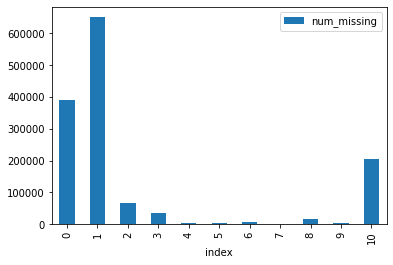

In [15]:
# first create missing indicator for features with missing data
for col in df_100g.columns:
    missing = df_100g[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_100g['{}_ismissing'.format(col)] = missing

# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_100g.columns if 'ismissing' in col]
df_100g['num_missing'] = df_100g[ismissing_cols].sum(axis=1)

#fig, ax = plt.subplots(figsize=(20,10))
df_100g['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [16]:
ind_missing = df_100g[df_100g['num_missing'] > 2].index
df_macro = df_macro.drop(ind_missing, axis=0)
df2 = df2.drop(ind_missing, axis=0)

I then delete the rows with more than two missing features as it will be more complicated to interpolate them in the futur.

In [17]:
df_macro

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,375.0,1569.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560
3,NaN,936.0,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840
5,21.0,88.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816
6,60.0,251.0,3.0,1.00,10.0,3.0,NaN,2.0,1.15,0.460
13,32.0,134.0,0.3,0.10,5.3,3.9,NaN,0.9,0.42,0.168
...,...,...,...,...,...,...,...,...,...,...
1443741,333.0,1393.0,20.2,6.00,30.9,10.4,NaN,7.4,1.10,0.440
1443742,NaN,925.0,7.6,4.80,35.0,24.0,NaN,2.6,0.28,0.112
1443743,131.0,548.0,5.0,2.30,0.0,0.0,NaN,21.5,0.18,0.072
1443745,100.0,418.0,12.0,1.00,2.0,1.0,NaN,1.0,1.00,0.400


In [18]:
df_macro.describe()

,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
count,1.043218e+06,1.106563e+06,1.104430e+06,1.073576e+06,1.104351e+06,1.097361e+06,441163.000000,1.106485e+06,1.105391e+06,1.105387e+06
mean,2.160168e+03,8.581562e+03,1.375179e+01,1.266794e+08,2.867567e+01,1.382134e+01,2.939507,8.589983e+00,1.897389e+00,7.590446e-01
std,1.918952e+06,7.795702e+06,1.760439e+01,1.312570e+11,2.867389e+01,2.003348e+01,6.128920,1.062895e+01,1.423754e+02,5.695089e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-20.000000,-4.000000e-01,0.000000e+00,0.000000e+00
25%,1.080000e+02,4.480000e+02,8.000000e-01,1.000000e-01,3.600000e+00,7.000000e-01,0.000000,1.400000e+00,7.250000e-02,2.900000e-02
50%,2.690000e+02,1.117000e+03,7.142857e+00,2.000000e+00,1.600000e+01,3.900000e+00,1.500000,6.000000e+00,5.600000e-01,2.240000e-01
75%,4.020000e+02,1.678000e+03,2.150000e+01,7.400000e+00,5.380000e+01,2.000000e+01,3.600000,1.212000e+01,1.370000e+00,5.480000e-01
max,1.959980e+09,8.200555e+09,1.400000e+03,1.360000e+14,2.834000e+03,1.350000e+03,2020.000000,2.500000e+03,1.050000e+05,4.200000e+04


##### Data Imputation


In [19]:
obj = df2.isna().mean().round(4) * 100
for key,value in obj.iteritems():
    print(key,",",value)

code , 0.0
product_name , 0.0
main_category_en , 42.11
pnns_groups_1 , 0.16999999999999998
pnns_groups_2 , 0.0
nutriscore_score , 47.699999999999996
nutriscore_grade , 47.699999999999996
energy-kcal_100g , 5.779999999999999
energy_100g , 0.06
fat_100g , 0.25
saturated-fat_100g , 3.04
carbohydrates_100g , 0.26
sugars_100g , 0.89
fiber_100g , 60.160000000000004
proteins_100g , 0.06999999999999999
salt_100g , 0.16999999999999998
sodium_100g , 0.16999999999999998



- energy-kcal_100g: 
- energy_100g:
- fat_100g
- saturated-fat_100g
- carbohydrates_100g
- sugars_100g
- fiber_100g : Fibres do not add calories and are not necessarily indicated on the products therefore if they are not indicated they can be considered as 0
- proteins_100g
- salt_100g
- sodium_100g

In [20]:
df2["fiber_100g"] = df2["fiber_100g"].fillna(0)

### 3.2 Outliers
##### Interpretation

Boxplot of different macro-nutrients

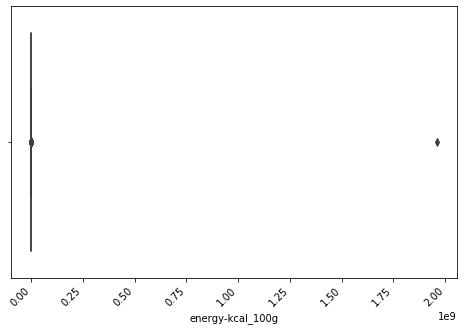

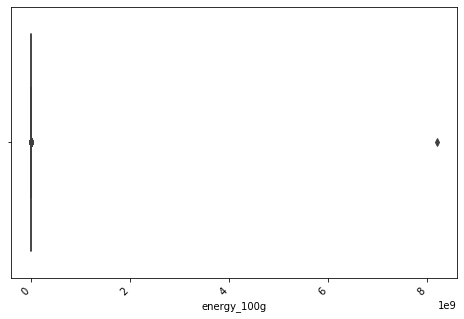

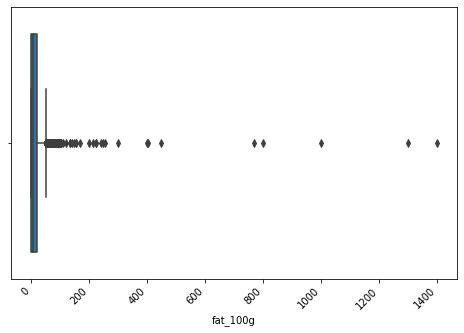

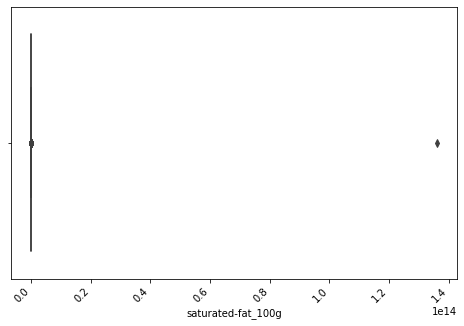

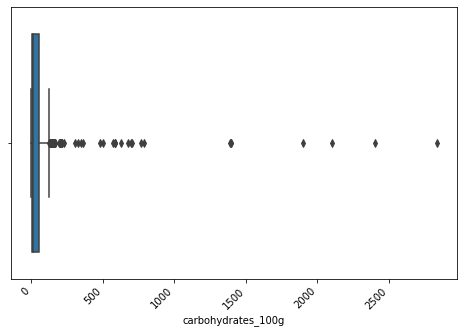

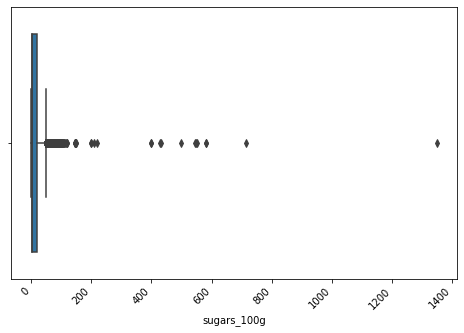

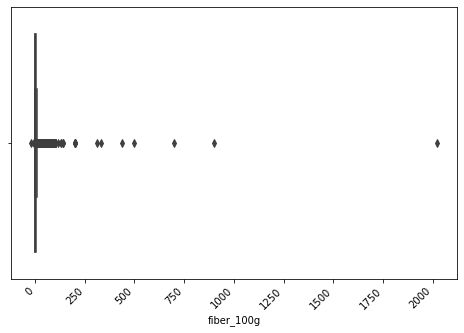

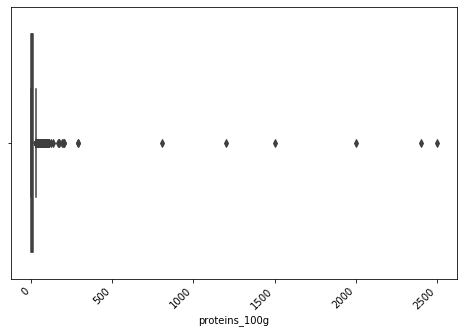

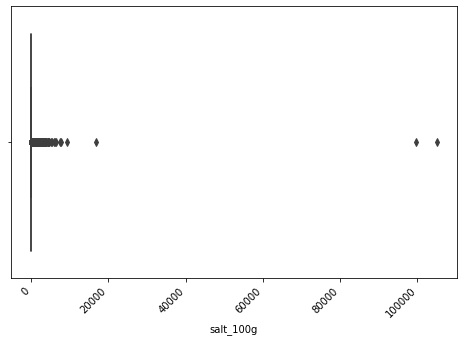

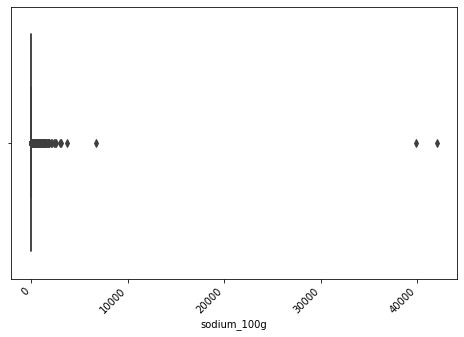

In [21]:
for col in df_macro.columns:
    fig = plt.figure(1, figsize=(8,5))
    sns.boxplot(data = df_macro,  x = col)
    plt.xticks(rotation=45, ha = "right")
    plt.show()
#df_macro.boxplot(column=['fat_100g'])


It is observed that there are many outliers in macro-nutrients when their proportion should be between 0 and 100g. 

The IQR score will now be calculated to determine if this method can be applied for outlier removal.

In [22]:
Q1 = df_macro.quantile(0.25)
Q3 = df_macro.quantile(0.75)
IQR = Q3 - Q1
IQR_lower = Q1 - (1.5 * IQR)
IQR_upper = Q3 + (1.5 * IQR)

dict = {'IQR': IQR, 'IQR_lower': IQR_lower, 'IQR_upper': IQR_upper}      
df_IQR = pd.DataFrame(dict)
df_IQR

,IQR,IQR_lower,IQR_upper
energy-kcal_100g,294.0000,-333.00000,843.00000
energy_100g,1230.0000,-1397.00000,3523.00000
fat_100g,20.7000,-30.25000,52.55000
saturated-fat_100g,7.3000,-10.85000,18.35000
carbohydrates_100g,50.2000,-71.70000,129.10000
sugars_100g,19.3000,-28.25000,48.95000
fiber_100g,3.6000,-5.40000,9.00000
proteins_100g,10.7200,-14.68000,28.20000
salt_100g,1.2975,-1.87375,3.31625
sodium_100g,0.5190,-0.74950,1.32650


The method of the IQR allows us to visualize the limits from which it is advisable to remove our outliers out in the case of our macro-nutrients we know the logical limits [0:100] that we will therefore apply with the following criteria

Deletion of products including :  

- A Nutrient is superior to 100g
- Sum of nutrients of a product above 100g
- Saturated fat is superior to fat.
- Sugars are superior to carbohydrates
- Calories are higher than 3700 kJ.

In [23]:
(df2.drop(columns=["code", "product_name","main_category_en","pnns_groups_1", "pnns_groups_2", "nutriscore_score", "nutriscore_grade", 'energy_100g', 'energy-kcal_100g'])>100).sum()

fat_100g               29
saturated-fat_100g     17
carbohydrates_100g     94
sugars_100g            36
fiber_100g             17
proteins_100g          20
salt_100g             475
sodium_100g           327
dtype: int64

In [24]:
for col in df2.drop(columns=["code", "product_name","main_category_en","pnns_groups_1", "pnns_groups_2", "nutriscore_score", "nutriscore_grade", 'energy_100g', 'energy-kcal_100g']).columns:
    df2.drop(df2[df2[col] > 100].index, inplace=True)
    
for col in df2.drop(columns=["code", "product_name","main_category_en","pnns_groups_1", "pnns_groups_2", "nutriscore_score", "nutriscore_grade", 'energy_100g', 'energy-kcal_100g']).columns:
    df2.drop(df2[df2[col] < 0].index, inplace=True)

nb = sum(df2[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'fiber_100g', 'salt_100g']].sum(axis=1)>100)
print("The number of products with more than 100g of macro nutrients is : {}".format(nb))
df2  = df2[df2[['fat_100g', 'carbohydrates_100g', 'proteins_100g', 'fiber_100g', 'salt_100g']].sum(axis=1)<100]

cond_fat = df2["fat_100g"]< df2["saturated-fat_100g"]
print("The number of products with more saturated fat than fat : {}".format(cond_fat.sum()))
df2 = df2[~cond_fat]

cond_sugars = df2["sugars_100g"]> df2["carbohydrates_100g"]
print("The number of products with more sugars than carbohydrates : {}".format(cond_sugars.sum()))
df2 = df2[~cond_sugars]


The number of products with more than 100g of macro nutrients is : 44156
The number of products with more saturated fat than fat : 726
The number of products with more sugars than carbohydrates : 830


In [25]:
max_energy = 3700
print("The number of products with energy higher than 3700 kJ is : {}".format(sum(df['energy_100g']>max_energy)))

The number of products with energy higher than 3700 kJ is : 9579


In [26]:
cond_energy = df2["energy_100g"]> max_energy
df2 = df2[~cond_energy]

In [27]:
df2[["sodium_100g", "salt_100g"]].corr()

,sodium_100g,salt_100g
sodium_100g,1.000000,0.999476
salt_100g,0.999476,1.000000


In [28]:
df2.drop(columns="sodium_100g", inplace=True)
df2.drop(columns="energy-kcal_100g", inplace=True)

### 3.2 Unnecessary & Inconsistent Data

##### Capitalization / Majuscules

In [29]:
df2['product_name'] = df2['product_name'].str.lower()

##### Doublons

In [30]:
key = ["code", "product_name"]

df2.fillna(-999).groupby(key)['product_name'].count().sort_values(ascending=False).head(20)

code           product_name                        
3261830123377  lot de 3 pâté de foie                   2
2157140007258  chorizo                                 1
2157390006056  sélection proscuito                     1
2157390005905  prosciutto                              1
2157390005806  proscuitto                              1
2157390005752  proscuitto                              1
2157390004908  prosciutto                              1
2157390004854  prosciutto                              1
2157390004700  prosciutto jambon                       1
2157390004557  prosciutto                              1
2157354004807  le broyard, de la région                1
2157225007555  le gruyere vieux du pays de fribourg    1
2157225006404  le gruyère aop vieux                    1
2157225005056  vieux du pays de fribourg               1
2157219004300  fromage du jura                         1
2157211003004  le jura                                 1
2157162011301  crevettes cuites     

In [31]:
df2 = df2.drop_duplicates(subset=key)


## 4. Synthèse


In [32]:
print("The proportion of data kept is : {:.2f} % or {} products".format(len(df2)/len(df)*100, len(df2)))

The proportion of data kept is : 72.41 % or 1045457 products


In [33]:
print("{:.2f} % of the data have a Nutrition grade".format(100*(1- df2["nutriscore_grade"].isna().sum()/len(df2))))

51.32 % of the data have a Nutrition grade


It does not seem feasible to perform a direct calculation on the present data to obtain the Nutri-Score of a product for the following reasons:

Too many products are not categorized, which makes it impossible to classify each product as a food or drink The proportion of fruits and vegetables is not globally known The creation of a predictive model seems feasible because all macro-nutrients are available and predicting the associated letter without using the nutrition score makes it possible to get rid of the problem of missing categories.

Moreover, if the method of calculating the Nutri-Score is changed, even if only slightly, it will only be necessary to restart the training of the model to obtain the correct prediction.


In [34]:
df2.to_csv("openfoodfacts_products_cleaned.csv",index=False)